### **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


___
#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
lead = pd.read_csv("Leads.csv")

#### Reading dataset

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the dataset

#### Dimension of the data

In [4]:
lead.shape

#9240 rows and 37 columns

(9240, 37)

#### columns

In [5]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Info about dataset

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Few columns have missing data / values

#### Data description / Statistical summary

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking for duplicates

In [8]:
lead.duplicated().sum()

0

- There is no duplicate data.

#### Looking for missing data

In [9]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Few columns have value as `Select` which is as good as null value 

In [11]:
# converting select to NaN
lead = lead.replace('Select',np.NaN)

#### Lokking for new missing values

In [12]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### looking at the % of missing data

In [13]:
round(100*(lead.isnull().sum()/len(lead.isnull())),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Data Cleaning

#### Dropping the columns with more than 45% missing data 

In [14]:
for i in lead.columns:
    if (round(100*(lead[i].isnull().sum()/len(lead.isnull())),2) >= 45):
        lead.drop(i, axis=1, inplace=True)

In [15]:
# remaining columns
print(lead.columns)

print('\n New Dimension:',lead.shape)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

 New Dimension: (9240, 30)


#### Looking at the remaining columns with missing values again

In [16]:
round(100*(lead.isnull().sum()/len(lead.isnull())),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Dropping irrelevant columns

In [17]:
lead.drop(['Last Activity','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview','Last Notable Activity','Receive More Updates About Our Courses',
          'Search'], axis=1, inplace=True)

#### New dimension

In [18]:
lead.shape

(9240, 17)

#### Looking at the remaining columns with missing values again

In [19]:
round(100*(lead.isnull().sum()/len(lead.isnull())),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
Tags                                             36.29
City                                             39.71
dtype: float64

#### Lead Source column

In [20]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [21]:
# replacing redundant values
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('welearnblog_Home','blog')
lead['Lead Source'] = lead['Lead Source']. replace(['Facebook','youtubechannel'],'Social Media')

In [22]:
lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [23]:
lead['Lead Source'].isnull().sum()

36

In [24]:
lead['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
NaN                    36
bing                    6
Click2call              4
Live Chat               2
blog                    2
Press_Release           2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
lead['Lead Source'].mode()

0    Google
dtype: object

In [26]:
# imputinng missing values with Google

lead['Lead Source'] = lead['Lead Source'].replace(np.NaN,'Google')
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
# checking for missing values again
lead['Lead Source'].isnull().sum()

0

In [28]:
print('Total Values:',lead['Lead Source'].count())
print('Google %:', round(100*(2909/9240),2))

Total Values: 9240
Google %: 31.48


#### TotalVisits column

In [29]:
# missing values 
lead['TotalVisits'].isnull().sum()

137

In [30]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

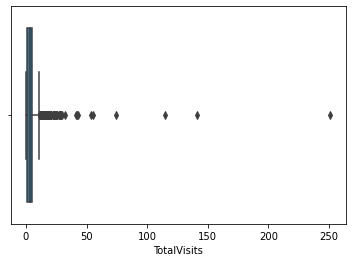

In [31]:
# looking for outlier
sns.boxplot(lead['TotalVisits'])
plt.show()

- Since data has outliers we'll impute the missing values with `Median`

In [32]:
# imputing values
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)

In [33]:
#checking for missing data again
lead['TotalVisits'].isnull().sum()

0

#### Page Views Per Visit column

In [34]:
# numerical data
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [35]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

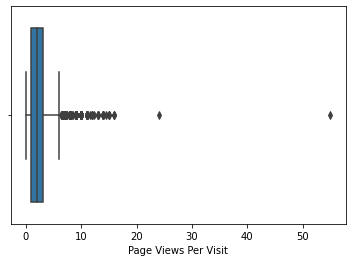

In [36]:
#checking for outliers
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Data has outlier we'll replace the nan value with the `median`

In [37]:
# imputing values

lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

#### Country column

In [38]:
lead.Country.value_counts(dropna=False) #dropna=False-->we can also see nan index values

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Philippines                2
China                      2
Italy                      2
Bangladesh                 2
Belgium                    2
Netherlands                2
Ghana                      2
Sri Lanka                  1
Switzerland                1
Kenya                      1
Liberia                    1
Indonesia                  1
Malaysia      

In [39]:
# looking at mode for imputation
lead.Country.mode()

0    India
dtype: object

In [40]:
# imputing missing values nan with India
lead['Country'].fillna('India', inplace=True)
lead.Country.isnull().sum()

0

In [41]:
print(lead.Country.value_counts())

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Belgium                    2
Uganda                     2
Bangladesh                 2
Netherlands                2
Ghana                      2
Philippines                2
Asia/Pacific Region        2
Italy                      2
China                      2
Denmark                    1
Indonesia                  1
Malaysia                   1
Russia                     1
Sri Lanka                  1
Liberia                    1
Kenya         

In [42]:
print('Total Values:', lead.Country.count())
print('India %:',round(100*(8953/9240),2))

Total Values: 9240
India %: 96.89


#### Specialization column

In [43]:
lead.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- Since the it is not necessary that a particular person has a specialization he/she could be student also, so its better to impute the values with Unknown 

In [44]:
# imputing values
lead.Specialization = lead.Specialization.fillna('Unknown')

In [45]:
lead.Specialization.value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [46]:
# checking for missing values again
lead.Specialization.isnull().sum()

0

In [47]:
print('Total Values:',lead.Specialization.count())
print('Unknown %:',round(100*(3380/9240),2))

Total Values: 9240
Unknown %: 36.58


#### What is your current occupation column

In [48]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
lead['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [50]:
# replacing nan value with Unemployed
lead['What is your current occupation'].fillna('Unemployed', inplace=True)

In [51]:
print(lead['What is your current occupation'].value_counts())
print('\n Missing values:',lead['What is your current occupation'].isnull().sum())

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

 Missing values: 0


In [52]:
print("Total Values:",lead['What is your current occupation'].count())
print('Unemployed %:',round(100*(8290/9240),2))

Total Values: 9240
Unemployed %: 89.72


#### What matters most to you in choosing a course column

In [53]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [54]:
# imputing nan values with Better Career Prospects

lead['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [55]:
print(lead['What matters most to you in choosing a course'].value_counts())
print('\n Missing value:',lead['What matters most to you in choosing a course'].isnull().sum())

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

 Missing value: 0


In [56]:
print('Total Values:',lead['What matters most to you in choosing a course'].count())
print('Better Career Prospects %:',round(100*(9237/9240),2))

Total Values: 9240
Better Career Prospects %: 99.97


#### Tags column

In [57]:
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [58]:
lead.Tags.mode() 

0    Will revert after reading the email
dtype: object

In [59]:
# imputing nan with Will revert after reading the email

lead['Tags'].fillna('Will revert after reading the email',inplace=True)

In [60]:
print(lead['Tags'].value_counts())
print('\n Missing value:',lead['Tags'].isnull().sum())

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [61]:
print('Total Values:',lead['Tags'].count())
print('Will revert after reading the email %:',round(100*(5425/9240),2))

Total Values: 9240
Will revert after reading the email %: 58.71


#### City column

In [62]:
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [63]:
lead.City.mode()

0    Mumbai
dtype: object

- imputing Nan with Mumbai.

In [64]:
# imputing value
lead['City'].fillna('Mumbai', inplace=True)

In [65]:
print(lead['City'].value_counts())
print('\n Missing value:',lead['City'].isnull().sum())

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

 Missing value: 0


In [66]:
print('Total Values:',lead['City'].count())
print('Mumbai %:',round(100*(6891/9240),2))

Total Values: 9240
Mumbai %: 74.58


#### checking for null values

In [67]:
round(100*(lead.isnull().sum()/len(lead.isnull())),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Through Recommendations                          0.0
Tags                                             0.0
City                                             0.0
dtype: float64

#### converting yes/no to 1/0 in categorical columns

In [68]:
vars = ['Do Not Email','Do Not Call','Through Recommendations']
for i in vars:
    lead[i] = lead[i].apply(lambda x: 1 if x=='Yes' else 0)

In [69]:
# looking at the dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,India,Unknown,Unemployed,Better Career Prospects,0,Interested in other courses,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,India,Unknown,Unemployed,Better Career Prospects,0,Ringing,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,Will revert after reading the email,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,Ringing,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Unknown,Unemployed,Better Career Prospects,0,Will revert after reading the email,Mumbai


In [70]:
#dropping Lead number as we already have Prospect Id

lead.drop('Lead Number', axis=1, inplace=True)

In [71]:
# looking at the dataset
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,India,Unknown,Unemployed,Better Career Prospects,0,Interested in other courses,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,India,Unknown,Unemployed,Better Career Prospects,0,Ringing,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,0,Will revert after reading the email,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,0,Ringing,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Unknown,Unemployed,Better Career Prospects,0,Will revert after reading the email,Mumbai


#### Statistical summary

In [72]:
lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440,0.000758
std,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781,0.027515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


#### New dimensions

In [73]:
lead.shape

(9240, 16)

## Performing EDA 

#### Looking for data imbalance

In [74]:
lead['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

- **Lead converted %: 38.53%**
- **Lead not-converted %: 61.46%**

#### Lead Origin and Lead Source

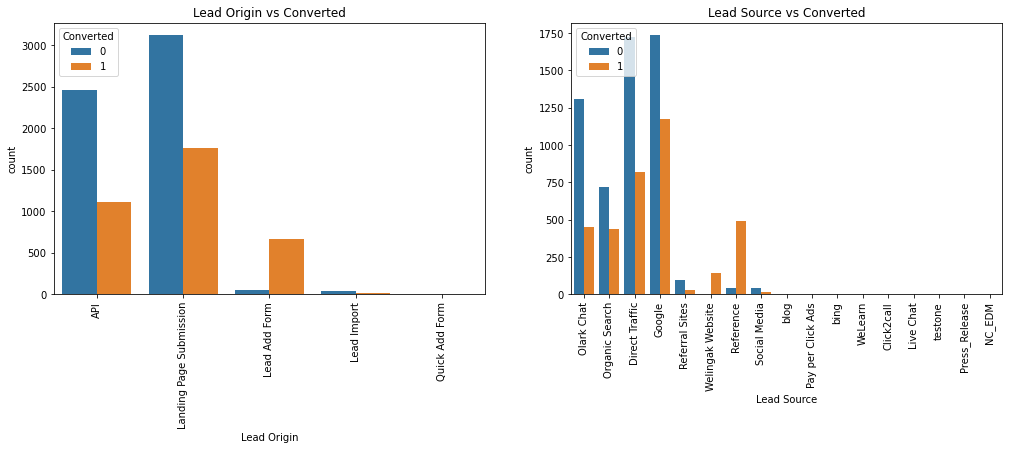

In [75]:
##plotting the boxplot to visualize the variable lead origin,lead source vs converted
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title("Lead Origin vs Converted")
sns.countplot(lead['Lead Origin'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Lead Source vs Converted")
sns.countplot(lead['Lead Source'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.show()

**Observation**
- Most of the converted leads have origin in `Landing Page Submission`.
- Most of the converted leads have Source from `Google search`.

In [76]:
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [77]:
# since most of the values in Lead Source are very few almost negligible so converting them into others
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','blog','Live Chat','Press_Release','Social Media',
                                              'NC_EDM','WeLearn','testone','Pay per Click Ads'],'Others')

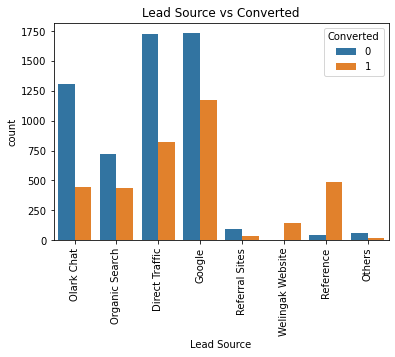

In [78]:
plt.title("Lead Source vs Converted")
sns.countplot(lead['Lead Source'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.show()

#### Looking for outliers

In [79]:
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_lead.describe(percentiles=[.25,.50,.75,.90,.95,.99,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


- Outlier is present is all 3 columns

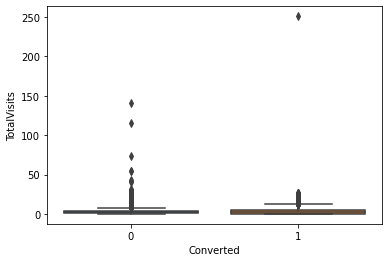

In [80]:
sns.boxplot(y='TotalVisits', x='Converted', data=lead)
plt.show()


# outlier needs to be handled

In [81]:
# remove outlier (statistical)

# outlier treatement for TotalVisits
Q1 = lead['TotalVisits'].quantile(0.25)
Q3 = lead['TotalVisits'].quantile(0.95)
IQR = Q3-Q1
lead['TotalVisits'] = lead['TotalVisits'][(lead['TotalVisits'] >= Q1-1.5*IQR) & (lead['TotalVisits'] <= Q3+1.5*IQR)]


# outlier treatement for Total Time Spent on Website
Q1 = lead['Total Time Spent on Website'].quantile(0.25)
Q3 = lead['Total Time Spent on Website'].quantile(0.95)
IQR = Q3-Q1
lead['Total Time Spent on Website'] = lead['Total Time Spent on Website'][(lead['Total Time Spent on Website'] >= Q1-1.5*IQR)
                                                                          & (lead['Total Time Spent on Website'] <= Q3+1.5*IQR)]

# outlier treatement for Page Views Per Visit
Q1 = lead['Page Views Per Visit'].quantile(0.25)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IQR = Q3-Q1
lead['Page Views Per Visit'] = lead['Page Views Per Visit'][(lead['Page Views Per Visit'] >= Q1-1.5*IQR)
                                                            & (lead['Page Views Per Visit'] <= Q3+1.5*IQR)]

In [82]:
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_lead.describe(percentiles=[.25,.50,.75,.90,.95,.99,1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9208.000000,9240.000000,9221.000000
mean,3.295938,487.698268,2.326781
std,3.208658,548.021466,1.995832
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,9.000000,1562.000000,6.000000
99%,15.000000,1840.610000,9.000000


In [83]:
# checking for missing data/values

print(lead['TotalVisits'].isnull().sum())
print(lead['Total Time Spent on Website'].isnull().sum())
print(lead['Page Views Per Visit'].isnull().sum())

32
0
19


In [84]:
# imputing data

lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())

In [85]:
print(lead['TotalVisits'].isnull().sum())
print(lead['Page Views Per Visit'].isnull().sum())

0
0


#### TotalVisits

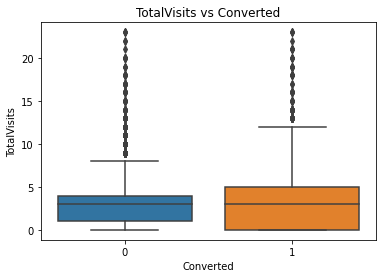

In [86]:
# checking for outliers boxplotting

sns.boxplot(y='TotalVisits', x='Converted', data=lead)
plt.title("TotalVisits vs Converted")
plt.show()

**Observation**
- The converted leads made around 3 median TotalVisits. 

#### Total Time Spent on Website

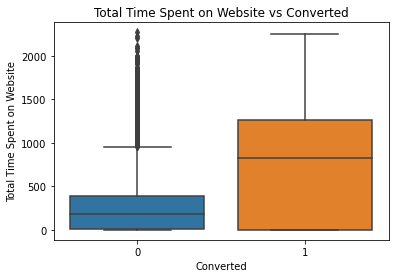

In [87]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=lead)
plt.title("Total Time Spent on Website vs Converted")
plt.show()

**observation**
- The converted leads has Spent around 800 Total median Time on Website. 

#### Page Views Per Visit

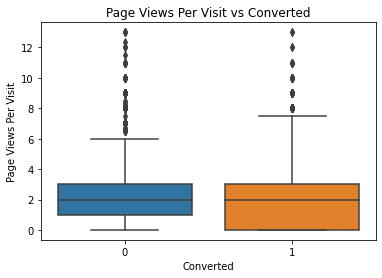

In [88]:
sns.boxplot(y='Page Views Per Visit', x='Converted', data=lead)
plt.title("Page Views Per Visit vs Converted")
plt.show()

# outlier handling required

**Observation**
- The converted leads has viewed around 2 (median) Pages per Visit.

#### Country and City

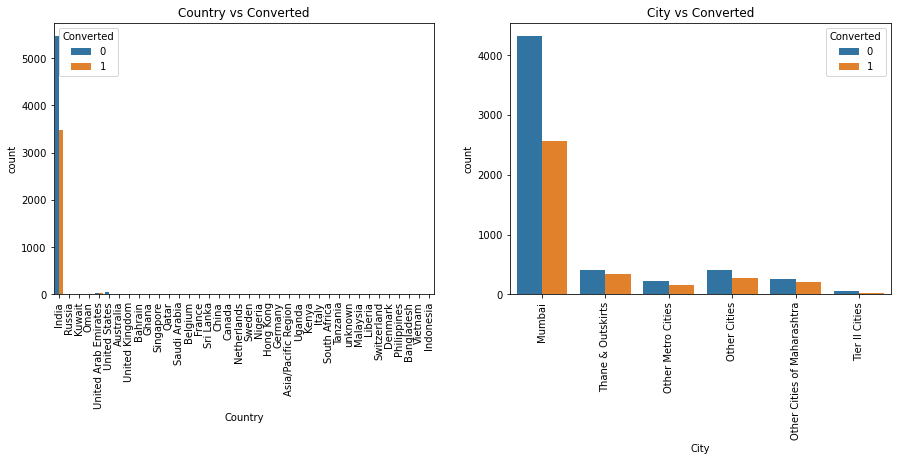

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Country vs Converted')
sns.countplot(lead['Country'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('City vs Converted')
sns.countplot(lead['City'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.show()

**Observation**
- Majority of the converted leads are from `India`
- Majority of the converted leads belongs to `Mumbai city`.

In [90]:
# Since majority of the values are present in india, US etc others are almost negligible so converting them to others

lead['Country'] = lead['Country'].replace(['Bahrain','Hong Kong','France','Oman','unknown','South Africa','Kuwait',
                                           'Canada','Germany','Nigeria','Sweden','Ghana','Italy','Philippines','Belgium',
                                           'Netherlands','Bangladesh','China','Uganda','Asia/Pacific Region','Sri Lanka',
                                           'Russia','Malaysia','Switzerland','Indonesia','Tanzania','Liberia','Denmark',
                                           'Vietnam','Kenya'],'Others')

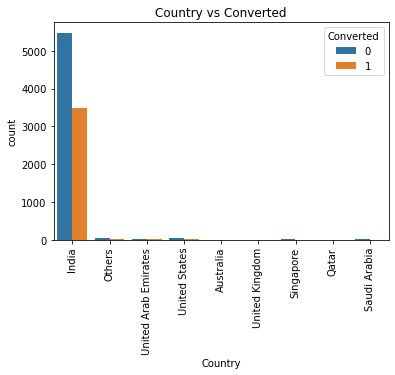

In [91]:
plt.title('Country vs Converted')
sns.countplot(lead['Country'], hue=lead['Converted'])
plt.xticks(rotation=90)
plt.show()

#### Specialization and What is your current occupation

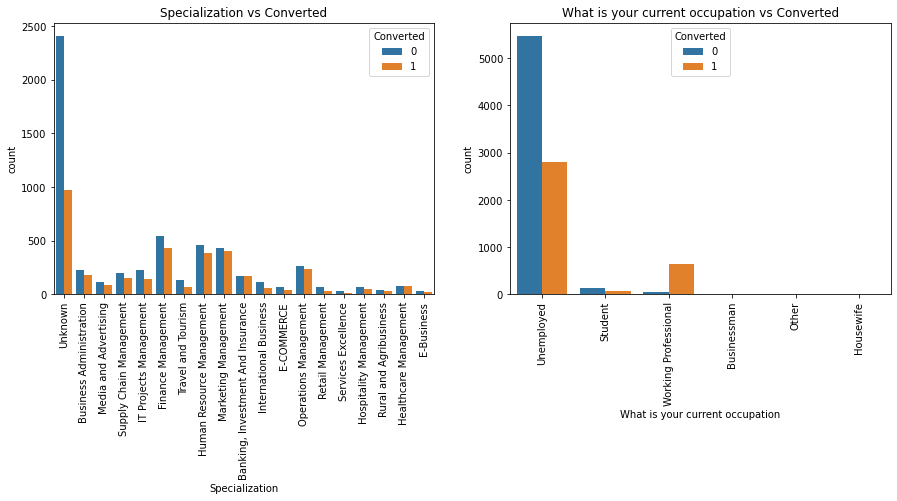

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Specialization vs Converted')
sns.countplot(lead['Specialization'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('What is your current occupation vs Converted')
sns.countplot(lead['What is your current occupation'], hue=lead['Converted'])
plt.xticks(rotation=90)

plt.show()

**Observation**
- Majority of the converted leads have specialization in `Finance Management`.
- Majority of converted leads are `Unemployed`.

#### What matters most to you in choosing a course column

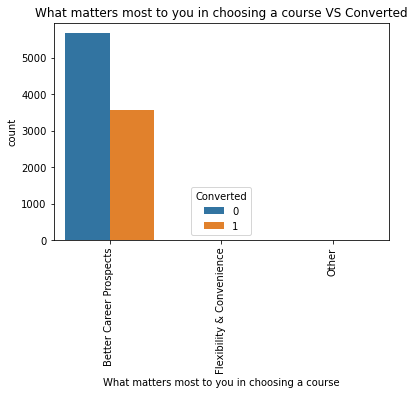

In [93]:
sns.countplot(lead['What matters most to you in choosing a course'], hue=lead['Converted'])
plt.title('What matters most to you in choosing a course VS Converted')
plt.xticks(rotation=90)

plt.show()

**Observation**
- Majority of converted clients choose course for `Better Career Prospects`.

#### Tags

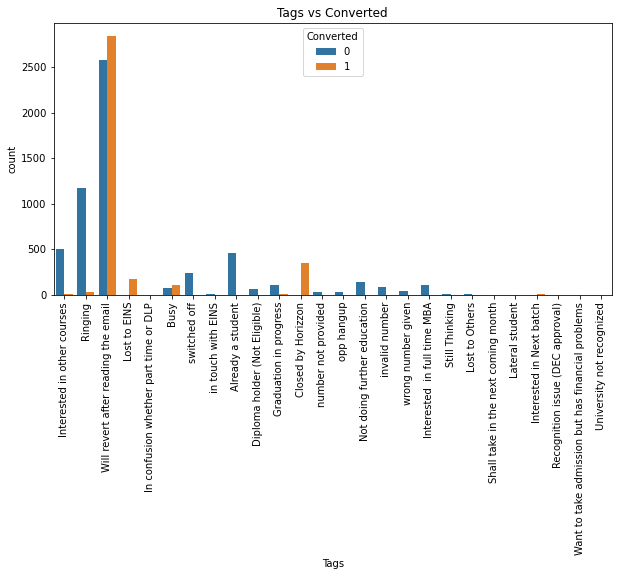

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(lead['Tags'], hue=lead['Converted'])
plt.title('Tags vs Converted')
plt.xticks(rotation=90)

plt.show()

**Observation**
- Majority of the converted leads were tagged as `Will revert after reading the email`.

In [95]:
# Few values are so low that they are almost negligible so converting them to others

lead['Tags'] = lead['Tags'].replace(['Lost to Others','Still Thinking','Want to take admission but has financial problems',
                                     'Interested in Next batch','In confusion whether part time or DLP','Lateral student',
                                     'Shall take in the next coming month','University not recognized',
                                     'Recognition issue (DEC approval)','in touch with EINS'],'Others')

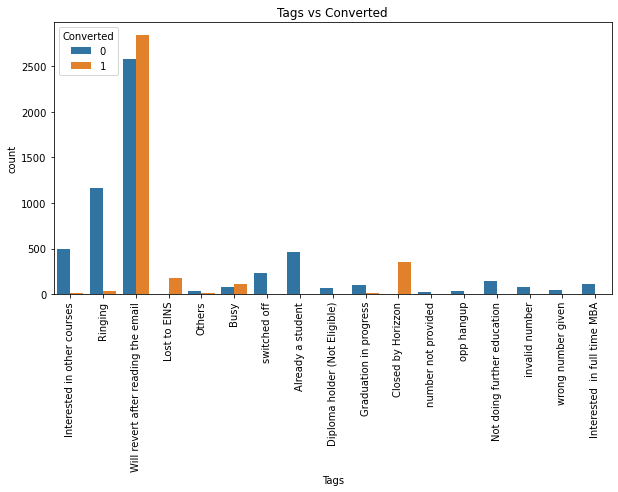

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(lead['Tags'], hue=lead['Converted'])
plt.title('Tags vs Converted')
plt.xticks(rotation=90)

plt.show()

#### Through Recommendations column

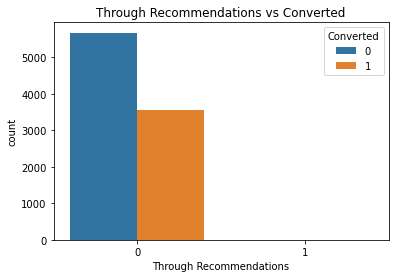

In [97]:
sns.countplot(lead['Through Recommendations'], hue=lead['Converted'])
plt.title('Through Recommendations vs Converted')
plt.show()

**Observation**
- Around 3500 converted leads came through recommendations.

#### Pairplot

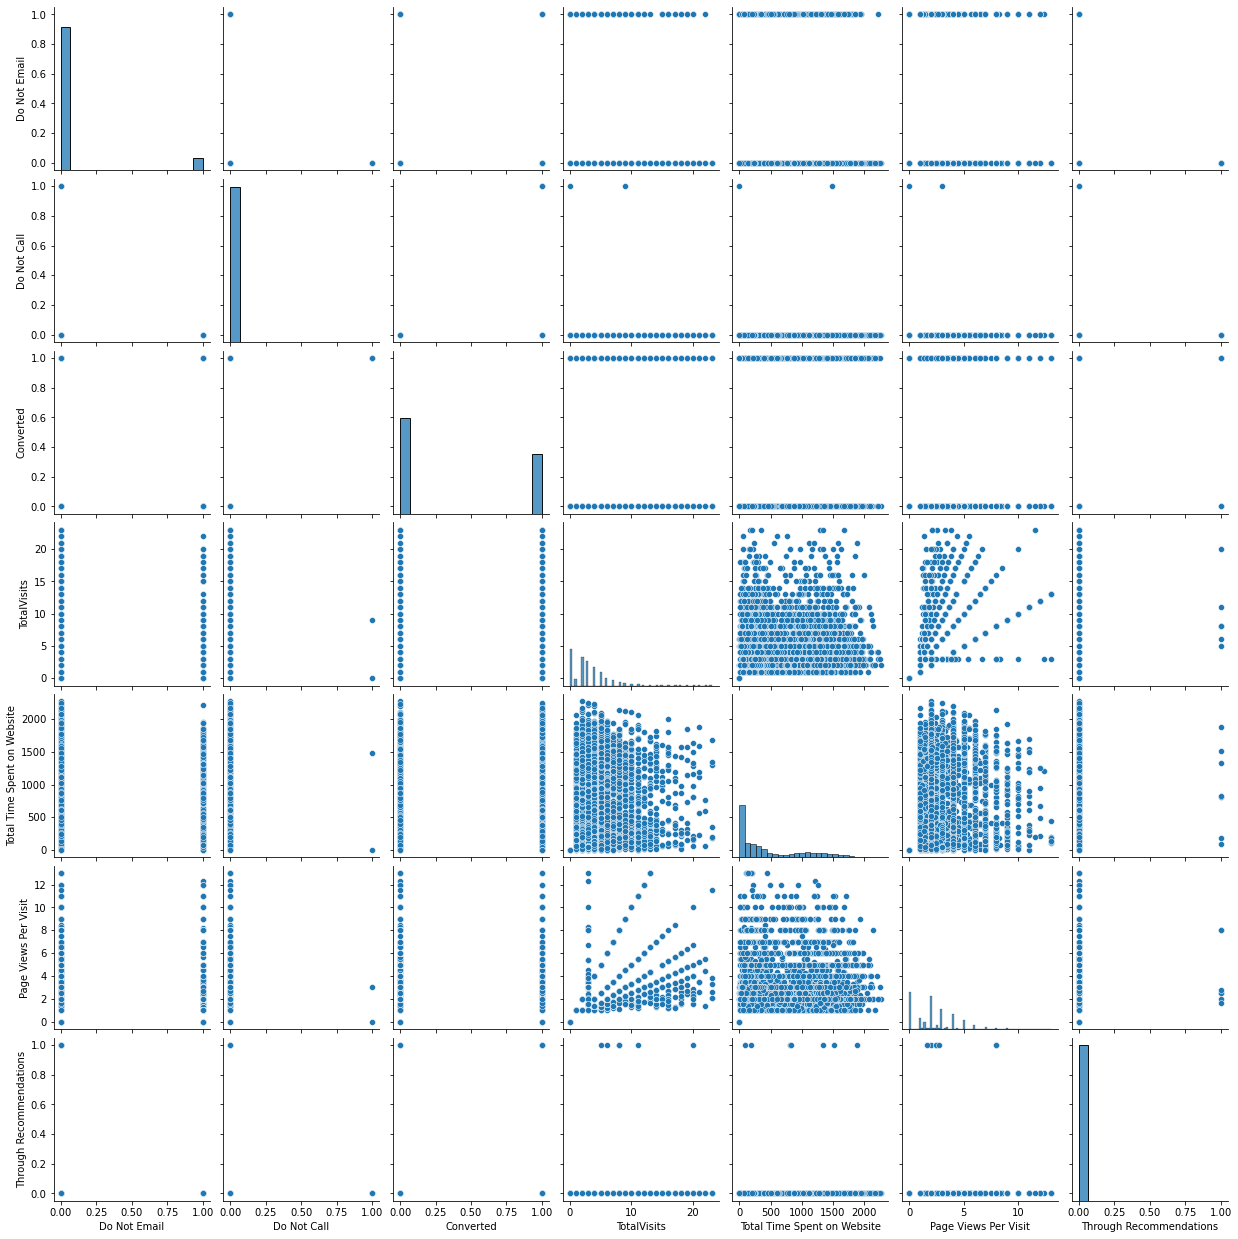

In [98]:
# Visualising through pair plot
sns.pairplot(lead)
plt.show()

#### Looking at the correlations

In [99]:
lead.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations
Do Not Email,1.000000,-0.004322,-0.135580,-0.001308,-0.046374,0.021697,-0.008088
Do Not Call,-0.004322,1.000000,0.018581,0.005536,0.006801,-0.006097,-0.000405
Converted,-0.135580,0.018581,1.000000,0.046572,0.362483,-0.004945,0.018607
TotalVisits,-0.001308,0.005536,0.046572,1.000000,0.329409,0.680137,0.052728
Total Time Spent on Website,-0.046374,0.006801,0.362483,0.329409,1.000000,0.329217,0.023186
Page Views Per Visit,0.021697,-0.006097,-0.004945,0.680137,0.329217,1.000000,0.021835
Through Recommendations,-0.008088,-0.000405,0.018607,0.052728,0.023186,0.021835,1.000000


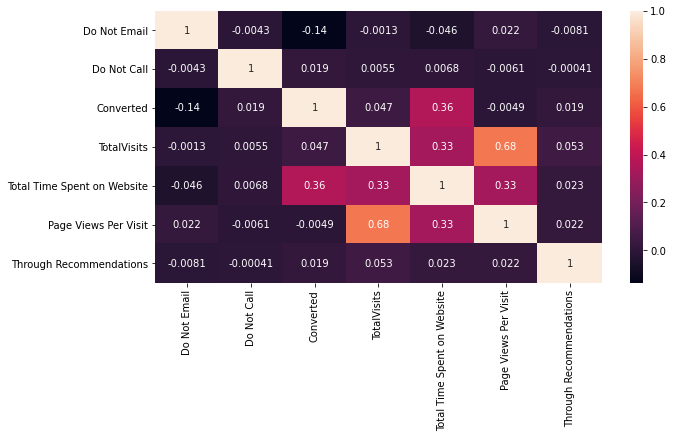

In [100]:
# Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(lead.corr(), annot=True)
plt.show()

In [101]:
# removing the columns which seems to be un-necessary

lead.drop(['Page Views Per Visit','What matters most to you in choosing a course','Through Recommendations'],
          axis=1, inplace=True)

In [102]:
# final dataset
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,Tags,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,India,Unknown,Unemployed,Interested in other courses,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,India,Unknown,Unemployed,Ringing,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,India,Business Administration,Student,Will revert after reading the email,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,India,Media and Advertising,Unemployed,Ringing,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,India,Unknown,Unemployed,Will revert after reading the email,Mumbai


#### Getting Dummies

In [103]:
#creating dummy variables

dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Country','Specialization','What is your current occupation',
                             'Tags','City']], drop_first=True)

# Adding results to lead
lead = pd.concat([lead,dummy1],axis=1)

In [104]:
# all columns
lead.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_India', 'Country_Others',
       'Country_Qatar', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
    

In [105]:
# We have created dummies for the below variables, so we can drop them

lead = lead.drop(['Lead Origin','Lead Source','Country','Specialization','What is your current occupation',
                             'Tags','City'], axis=1)

___
### Summary of EDA

- Most of the converted leads have origin in `Landing Page Submission`.
- Most of the converted leads have Source from `Google search`.

- The converted leads made around `3` median TotalVisits. 
- The converted leads has viewed around `2` (median) Pages per Visit.

- Majority of the converted leads are from `India`
- Majority of the converted leads belongs to `Mumbai city`.

- Majority of the converted leads have specialization in `Finance Management`.
- Majority of converted leads are `Unemployed`.

- Majority of converted clients choose course for `Better Career Prospects`.

- Majority of the converted leads were tagged as `Will revert after reading the email`.

- Around `3500` converted leads came through recommendations.
___

### Splitting data into train and test set

In [106]:
# importing library
from sklearn.model_selection import train_test_split

#### Dividing X and y

In [107]:
# Putting feature variable to X

X = lead.drop(['Converted','Prospect ID'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Putting response variable in y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
np.random.seed(0)
# We specify this so that the train and test dataset always have same rows, respectively

# splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [110]:
# importing library
from sklearn.preprocessing import StandardScaler

In [111]:
# Scaling the variables

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,-1.022425,-0.885371,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.220278,0.005716,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3516,0,0,0.530954,-0.691418,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.530954,1.365219,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3934,0,0,-1.022425,-0.885371,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### checking conversion rate

In [112]:
convert = round(sum(lead['Converted'])/len(lead['Converted'])*100,2)
convert

38.54

We have almost 39% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

## Model Building

#### model 1

In [113]:
# importing library
import statsmodels.api as sm

In [114]:
# adding constant, creating and fitting the model and summarizing the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2065.0
Date:                Sat, 21 Oct 2023   Deviance:                       4130.0
Time:                        16:39:18   Pearson chi2:                 1.16e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.1230      2.157     -3.765      0.000     -12.351      -3.895
Do Not Email                                            -1.4135      0.179     -7.903      0.000      -1.764      -1.063
Do Not Call                                             21.9017   1.35e+05      0.000      1.000   -2.65e+05    2.65e+05
TotalVisits                                              0.0172      0.049      0.351      0.726      -0.079       0.113
Total Time Spent on Website                              1.1110      0.049     22.891      0.000       1.016       1.206
Lead Origin_Landing Page Submission                     -0.9728      0.160     -6.088      0.000      -1.286      -0.660
Lead Origin_Lead Add Form                                3.1890      0.531      6.009      0.000       2.149       4.229
Lead Origin_Lead Import                                  0.1952      0.910      0.215      0.830      -1.588       1.978
Lead Origin_Quick Add Form                              21.8947   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2554      0.115      2.223      0.026       0.030       0.481
Lead Source_Olark Chat                                   0.6315      0.170      3.718      0.000       0.299       0.964
Lead Source_Organic Search                               0.2928      0.149      1.970      0.049       0.001       0.584
Lead Source_Others                                      -0.2298      0.656     -0.351      0.726      -1.515       1.055
Lead Source_Reference                                    0.1465      0.593      0.247      0.805      -1.016       1.309
Lead Source_Referral Sites                              -0.1393      0.354     -0.393      0.694      -0.834       0.555
Lead Source_Welingak Website                             2.3560      0.894      2.634      0.008       0.603       4.109
Country_India                                            2.6121      1.559      1.676      0.094      -0.443       5.667
Country_Others                                           2.2940      1.614      1.421      0.155      -0.869       5.457
Country_Qatar                                          -20.9049   5.82e+04     -0.000      1.000   -1.14e+05    1.14e+05
Country_Saudi Arabia                                     1.6417      1.831      0.897      0.370      -1.946       5.230
Country_Singapore                                        2.5241      1.766      1.429      0.153      -0.938       5.986
Country_United Arab Emirates                             2.8749      1.629      1.765      0.078      -0.318       6.067
Country_United Kingdom                                   2

### Feature Selection using RFE

In [115]:
# importing the library
from sklearn.linear_model import LogisticRegression

In [116]:
# instantiate
logreg = LogisticRegression()

In [117]:
# importing library
from sklearn.feature_selection import RFE

In [118]:
# Selecting top 15 features through  RFE method
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('TotalVisits', False, 52),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 38),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_India', False, 17),
 ('Country_Others', False, 36),
 ('Country_Qatar', False, 5),
 ('Country_Saudi Arabia', False, 19),
 ('Country_Singapore', False, 30),
 ('Country_United Arab Emirates', False, 15),
 ('Country_United Kingdom', False, 47),
 ('Country_United States', False, 16),
 ('Specialization_Business Administration', False, 46),
 ('Specialization_E-Business', False, 29),
 ('Specialization_E-C

In [121]:
col = X_train.columns[rfe.support_]

In [122]:
# removing columns not selected by rfe
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_India', 'Country_Others',
       'Country_Qatar', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Ma

#### model 2

In [123]:
# adding constant, creating and fitting the model and summarizing the model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Sat, 21 Oct 2023   Deviance:                       4201.4
Time:                        16:39:43   Pearson chi2:                 1.14e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4933
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [124]:
# getting predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.017329
6795    0.171685
3516    0.005651
8105    0.053878
3934    0.208524
4844    0.986516
3297    0.006421
8071    0.999977
987     0.553570
7423    0.837088
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01732919, 0.17168542, 0.00565135, 0.05387778, 0.20852394,
       0.98651563, 0.00642069, 0.99997661, 0.55357   , 0.83708812])

##### Creating a dataframe with the actual converted and the predicted probabilities

In [126]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
0,0,0.017329,1871
1,0,0.171685,6795
2,0,0.005651,3516
3,0,0.053878,8105
4,0,0.208524,3934


##### Creating new column 'Converted' with 1 if Convert_Prob > 0.5 else 0

In [127]:
y_train_pred_final['Converted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)

# lets see the head()
y_train_pred_final.head(10)

,Convert,Convert_Prob,Prospect ID,Converted
0,0,0.017329,1871,0
1,0,0.171685,6795,0
2,0,0.005651,3516,0
3,0,0.053878,8105,0
4,0,0.208524,3934,0
5,1,0.986516,4844,1
6,0,0.006421,3297,0
7,1,0.999977,8071,1
8,0,0.553570,987,1
9,1,0.837088,7423,1


In [128]:
# importing library
from sklearn import metrics

In [129]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Converted)
print(confusion)

[[3702  300]
 [ 552 1914]]


In [130]:
# Predicted/Actual     not_convert    convert

# not_convert        3702      300
# convert            552       1914

In [131]:
# checking for overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Converted))

0.8682745825602969


### Checking VIFs

In [132]:
# importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,9.88
2,Lead Origin_Landing Page Submission,5.29
5,Specialization_Unknown,3.88
14,Tags_Will revert after reading the email,3.03
3,Lead Origin_Lead Add Form,1.83
7,What is your current occupation_Working Profes...,1.75
9,Tags_Closed by Horizzon,1.34
4,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.18
0,Do Not Email,1.11


Few features have high vif values but dropping `Tags_Diploma holder (Not Eligible)` as it has `high p-value`.

In [134]:
col = col.drop('Tags_Diploma holder (Not Eligible)',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Unknown',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### model 3

In [135]:
# adding constant, creating and fitting the model and summarizing the model

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.1
Date:                Sat, 21 Oct 2023   Deviance:                       4206.2
Time:                        16:40:00   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4929
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [136]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [137]:
y_train_pred[:10]

array([0.01654009, 0.17312896, 0.00543144, 0.05178928, 0.2087908 ,
       0.98603853, 0.00618661, 0.99997578, 0.55320141, 0.83649493])

In [138]:
y_train_pred = y_train_pred_final['Convert_Prob']

In [139]:
# Creating new column 'converted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Converted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Convert,Convert_Prob,Prospect ID,Converted
0,0,0.017329,1871,0
1,0,0.171685,6795,0
2,0,0.005651,3516,0
3,0,0.053878,8105,0
4,0,0.208524,3934,0
5,1,0.986516,4844,1
6,0,0.006421,3297,0
7,1,0.999977,8071,1
8,0,0.553570,987,1
9,1,0.837088,7423,1


In [140]:
# checking overall accuracy.
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Converted))

Accuracy: 0.8682745825602969


So overall the accuracy is still same.

##### Let's check the VIFs again

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,9.82
2,Lead Origin_Landing Page Submission,5.29
5,Specialization_Unknown,3.88
13,Tags_Will revert after reading the email,2.99
3,Lead Origin_Lead Add Form,1.83
7,What is your current occupation_Working Profes...,1.75
9,Tags_Closed by Horizzon,1.34
4,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.18
0,Do Not Email,1.11


In [142]:
# dropping 'What is your current occupation_Unemployed' as it has high vif value
col = col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Unknown',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### model 4

In [143]:
# adding constant, creating and fitting the model and summarizing the model

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.7
Date:                Sat, 21 Oct 2023   Deviance:                       4221.3
Time:                        16:40:05   Pearson chi2:                 1.12e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4917
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [144]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [145]:
y_train_pred[:10]

array([0.01726216, 0.1770125 , 0.00569225, 0.05508305, 0.21018291,
       0.98604617, 0.00656812, 0.99997551, 0.55614197, 0.83855176])

In [146]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [147]:
# Creating new column 'Converted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['Converted'] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final['Convert_Prob'].map(lambda x:round(x*100))
y_train_pred_final.head(10)

,Convert,Convert_Prob,Prospect ID,Converted,Lead Score
0,0,0.017262,1871,0,2
1,0,0.177013,6795,0,18
2,0,0.005692,3516,0,1
3,0,0.055083,8105,0,6
4,0,0.210183,3934,0,21
5,1,0.986046,4844,1,99
6,0,0.006568,3297,0,1
7,1,0.999976,8071,1,100
8,0,0.556142,987,1,56
9,1,0.838552,7423,1,84


In [148]:
# calculating accuracy
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Converted))

Accuracy: 0.8671923314780458


Accuracy has dropped marginally, but its still almost the same

#### Checking Vif again

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,2.51
5,Specialization_Unknown,1.82
2,Lead Origin_Landing Page Submission,1.78
3,Lead Origin_Lead Add Form,1.68
8,Tags_Closed by Horizzon,1.31
4,Lead Source_Welingak Website,1.26
6,What is your current occupation_Working Profes...,1.22
1,Total Time Spent on Website,1.17
0,Do Not Email,1.11
7,Tags_Busy,1.05


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [150]:
# looking at confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Converted)
confusion

array([[3703,  299],
       [ 560, 1906]], dtype=int64)

In [151]:
# Actual/Predicted     not_convert    convert
        # not_convert        3269      366
        # convert            595       692  

In [152]:
# checking overall accuracy
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Converted))

Accuracy: 0.8671923314780458


#### Looking Other Metrics 

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# sensitivity of the model
TP/(TP+FN)

0.772911597729116

In [155]:
# checking specificity
TN/(TN+FP)

0.9252873563218391

In [156]:
# Calculate false postive rate - predicting convert when customer does not have converted
FP/(FP+TN)

0.07471264367816093

In [157]:
# positive predictive value 
TP/(TP+FP)

# 86% of cases are +ve when they are really +ve

0.8643990929705215

In [158]:
# Negative predictive value
TN/(TN+FN)

# 86% of cases are -ve when they really are -ve

0.8686371100164204

### Plotting the ROC Curve

In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

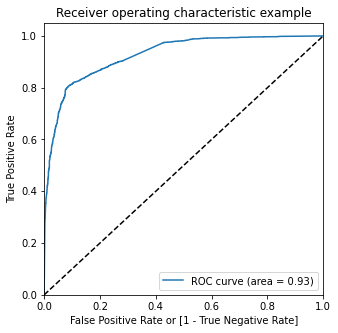

In [161]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

- We have around `93%` of the data under the curve which is good.

###  Finding Optimal Cutoff Point

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,Converted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.017262,1871,0,2,1,0,0,0,0,0,0,0,0,0
1,0,0.177013,6795,0,18,1,1,0,0,0,0,0,0,0,0
2,0,0.005692,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.055083,8105,0,6,1,0,0,0,0,0,0,0,0,0
4,0,0.210183,3934,0,21,1,1,1,0,0,0,0,0,0,0


In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.703772     0.978508     0.534483
0.2          0.2  0.726809     0.972830     0.575212
0.3          0.3  0.831323     0.862936     0.811844
0.4          0.4  0.867038     0.815491     0.898801
0.5          0.5  0.867192     0.772912     0.925287
0.6          0.6  0.858844     0.723844     0.942029
0.7          0.7  0.841991     0.657340     0.955772
0.8          0.8  0.812616     0.548662     0.975262
0.9          0.9  0.763760     0.395377     0.990755


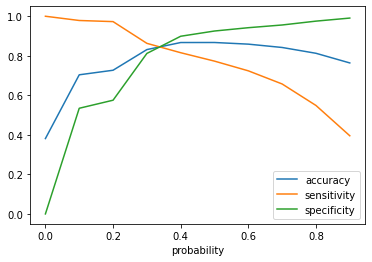

In [164]:
#  plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the curve above, `0.35` is the optimum point to take it as a cutoff probability.

In [165]:
y_train_pred_final['Final_Converted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.35 else 0) 
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,Converted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Converted
0,0,0.017262,1871,0,2,1,0,0,0,0,0,0,0,0,0,0
1,0,0.177013,6795,0,18,1,1,0,0,0,0,0,0,0,0,0
2,0,0.005692,3516,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.055083,8105,0,6,1,0,0,0,0,0,0,0,0,0,0
4,0,0.210183,3934,0,21,1,1,1,0,0,0,0,0,0,0,0


In [166]:
# overall accuracy
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Final_Converted))

Accuracy: 0.8509585652442795


In [167]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Final_Converted)
confusion2

array([[3443,  559],
       [ 405, 2061]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# sensitivity
TP/(TP+FN)

0.8357664233576643

In [170]:
# specificity
TN/(TN+FP)

0.86031984007996

In [171]:
# Calculate false postive rate - predicting convert when customer does not have converted
FP/(FP+TN)

0.13968015992004

In [172]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7866412213740458


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8947505197505198


### Precision and Recall

In [174]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Converted)
confusion

array([[3703,  299],
       [ 560, 1906]], dtype=int64)

In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# using sklearn utilitiese
# importing libraries
from sklearn.metrics import precision_score, recall_score

In [177]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.Converted)

0.8643990929705215

In [178]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.Converted)

0.772911597729116

### Precision and recall tradeoff

In [179]:
# importing library
from sklearn.metrics import precision_recall_curve

In [180]:
y_train_pred_final.Convert, y_train_pred_final.Converted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64)

In [181]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

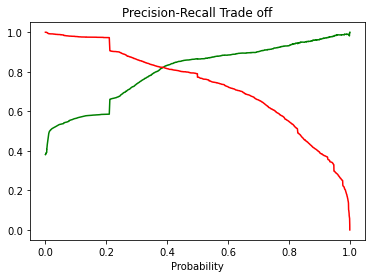

In [182]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In `Probability` plot `0.35` probability `looks optimal` and in `Precision-Recall Curve` also `0.35` looks optimal.

We are taking `0.35` is the `optimum point as a cutoff probability` and assigning Lead Score in training data.

###  Making predictions on the test set

In [183]:
# Feature Scaling
X_test[['TotalVisits','Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4269,0,0,1.462981,0.964504,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,0,-1.022425,-0.885371,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,0,0,0.530954,-0.777416,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9199,0,0,-1.022425,-0.885371,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4359,0,0,-1.022425,-0.885371,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [184]:
X_test = X_test[col]
X_test

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Specialization_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Lost to EINS,Tags_Others,Tags_Will revert after reading the email
4269,0,0.964504,0,0,0,1,0,0,0,0,0,0,1
2376,0,-0.885371,0,1,0,1,0,0,0,0,0,0,1
7766,0,-0.777416,0,0,0,0,1,0,0,0,0,0,1
9199,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,0,-0.354744,1,0,0,0,0,0,0,0,0,0,1
2152,0,-0.885371,0,1,0,1,0,0,0,0,0,0,1
7101,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0
5331,1,2.056864,1,0,0,0,0,0,0,0,0,0,1


In [185]:
X_test_sm = sm.add_constant(X_test[col])

**making predictions on test set**

In [186]:
y_test_pred = res.predict(X_test_sm)

In [187]:
y_test_pred[:10]

4269    0.645226
2376    0.828147
7766    0.934224
9199    0.004658
4359    0.947608
9186    0.505883
1631    0.686939
8963    0.306965
8007    0.380850
5324    0.302434
dtype: float64

In [188]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [189]:
y_pred_1.head()

,0
4269,0.645226
2376,0.828147
7766,0.934224
9199,0.004658
4359,0.947608


In [190]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [191]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [192]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [193]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [194]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.645226
1,1,2376,0.828147
2,1,7766,0.934224
3,0,9199,0.004658
4,1,4359,0.947608


In [195]:
#Renaming the column
y_pred_final = y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [196]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Convert_Prob'], axis=1)

In [197]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob
0,4269,1,0.645226
1,2376,1,0.828147
2,7766,1,0.934224
3,9199,0,0.004658
4,4359,1,0.947608


In [198]:
# Adding Final Converted and Lead Score column
y_pred_final['Final_Converted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['Lead Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [199]:
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,Final_Converted,Lead Score
0,4269,1,0.645226,1,65
1,2376,1,0.828147,1,83
2,7766,1,0.934224,1,93
3,9199,0,0.004658,0,0
4,4359,1,0.947608,1,95


In [200]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Converted)

0.8492063492063492

In [201]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Converted)
confusion2

array([[1417,  260],
       [ 158,  937]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8557077625570776

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.8449612403100775

In [205]:
# precision
TP / float(TP+FP)

0.7827903091060986

#### Looing at final Features and Parameters of our final model

In [206]:
print("Features used in Final Model :", col)

print("\n\n-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Specialization_Unknown',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Will revert after reading the email'],
      dtype='object')


-----------------------Feature Importance--------------------
const                                                  -3.121961
Do Not Email                                           -1.423546
Total Time Spent on Website                             1.038959
Lead Origin_Landing Page Submission                    -1.138701
Lead Origin_Lead Add Form                               2.896377
Lead Source_Welingak Website                            2.158185
Specialization_Unknown                                 -1.32262

___
                                                **THE END**